# 1.- CONTEXTO, OBJETIVOS E HIPÓTESIS

## Abstract

El cáncer de pulmón constituye una de las principales causas de muerte a nivel mundial, siendo el tabaquismo y la exposición ambiental factores determinantes en su desarrollo. Este estudio utiliza un conjunto de datos de 50.000 registros de pacientes, que incluye variables demográficas y clínicas como edad, género, años fumando (`pack_years`), exposición al radón, asbesto, humo de segunda mano, consumo de alcohol, antecedentes familiares y diagnóstico de EPOC. El objetivo general es identificar los factores de mayor influencia en la aparición de cáncer de pulmón y desarrollar modelos predictivos que contribuyan a la detección temprana y prevención.

Se emplearon tres enfoques analíticos complementarios: modelos de regresión para evaluar la relación cuantitativa entre los años fumando y el riesgo; clasificación para predecir la presencia de cáncer a partir de múltiples factores; y agrupamiento (clustering) para descubrir perfiles de riesgo en la población. Los hallazgos preliminares sugieren que la edad avanzada, un alto número de `pack_years`, y la exposición a radón y asbesto se asocian fuertemente con el diagnóstico positivo de cáncer de pulmón.

Estos resultados respaldan la importancia de combinar análisis predictivos y exploratorios para comprender mejor los determinantes del cáncer pulmonar y orientar estrategias de prevención más personalizadas, contribuyendo así a una toma de decisiones médicas basada en datos y a políticas de salud pública más efectivas.

## Objetivos e hipótesis

**Objetivo General de negocio:**

Predecir y comprender los factores de riesgo que influyen en la aparición de cáncer de pulmón, con el fin de apoyar la detección temprana y prevención en poblaciones vulnerables, contribuyendo a la toma de decisiones clínicas y campañas de salud pública más efectivas.

**Objetivos específicos:**

1. Identificar las variables más influyentes (edad, años fumando, exposición a radón, etc.) en la probabilidad de desarrollar cáncer de pulmón.
→ Ligado a la hipótesis de regresión.

2. Desarrollar un modelo predictivo de clasificación que permita estimar si un paciente presenta o no cáncer de pulmón según sus características y hábitos.
→ Ligado a la hipótesis de clasificación.

3. Descubrir grupos o perfiles de riesgo entre los pacientes (por ejemplo, fumadores con exposición laboral o ambiental) para orientar estrategias de prevención.
→ Ligado a la hipótesis de agrupamiento.



---



**Hipótesis para problema de regresión:**

A mayor número de `pack_years` (años fumando) y mayor edad, más alta será la probabilidad o severidad del riesgo de cáncer de pulmón.

Variables relevantes: `age`, `pack_years`, `radon_exposure`, `asbestos_exposure`, `copd_diagnosis`.

**Hipótesis para problema de clasificación:**

Factores como la exposición al radón, al asbesto y el diagnóstico de EPOC incrementan significativamente la probabilidad de que un paciente sea diagnosticado con cáncer de pulmón (`lung_cancer = Yes`).

Variables relevantes: `radon_exposure`, `asbestos_exposure`, `copd_diagnosis`, `secondhand_smoke_exposure`, `family_history`, `alcohol_consumption`.

**Hipótesis para problema de agrupamiento:**

Es posible identificar subgrupos naturales de pacientes con patrones similares de exposición y diagnóstico, tales como:

- fumadores crónicos con exposición ambiental alta,

- no fumadores con antecedentes familiares,

- pacientes con EPOC y alcoholismo moderado.

# 2.- PREPARACIÓN DE LOS DATOS

## Carga del dataset e importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("lung_cancer_dataset.csv")

df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


## Descripción del dataset

**Origen:**

El dataset proviene de la plataforma Kaggle (https://www.kaggle.com/datasets/mikeytracegod/lung-cancer-risk-dataset). Fue diseñado con fines educativos y de investigación para analizar factores de riesgo asociados al cáncer de pulmón. No representa registros clínicos reales, sino una simulación basada en tendencias epidemiológicas y literatura médica.

**Tamaño:**

El conjunto de datos contiene 50.000 registros correspondientes a distintos pacientes, y 11 variables (una identificadora y diez con información demográfica, clínica y de exposición a factores de riesgo).

**Variables incluidas:**

| Variable                    | Descripción                                                                          | Tipo                 |
| --------------------------- | ------------------------------------------------------------------------------------ | -------------------- |
| `patient_id`                | Identificador único del paciente                                                     | Numérica (entera)    |
| `age`                       | Edad del paciente en años                                                            | Numérica (entera)    |
| `gender`                    | Sexo biológico del paciente (Male/Female)                                            | Categórica           |
| `pack_years`                | Índice de exposición al tabaco (*años fumando × cantidad de cigarrillos diarios/20*) | Numérica (decimal)   |
| `radon_exposure`            | Nivel de exposición al gas radón (Low / Medium / High)                               | Categórica           |
| `asbestos_exposure`         | Exposición laboral o ambiental al asbesto (Yes / No)                                 | Categórica           |
| `secondhand_smoke_exposure` | Exposición pasiva al humo del tabaco                                                 | Categórica           |
| `copd_diagnosis`            | Diagnóstico previo de EPOC (Yes / No)                                                | Categórica           |
| `alcohol_consumption`       | Nivel de consumo de alcohol (None / Moderate / High)                                 | Categórica           |
| `family_history`            | Antecedentes familiares de cáncer pulmonar                                           | Categórica           |
| `lung_cancer`               | Diagnóstico final de cáncer de pulmón (Yes / No) → *Variable objetivo*               | Categórica (binaria) |


**Supuestos:**

- El dataset es sintético, por lo que los datos son generados artificialmente y no provienen de registros médicos reales.

- Las categorías son mutuamente excluyentes y exhaustivas.

- No existen valores nulos ni inconsistencias estructurales.

- La variable `lung_cancer` se considera la etiqueta o target principal para problemas de clasificación.

**Licencia y uso:**

El dataset está disponible en Kaggle bajo licencia pública, destinada al uso académico y de investigación. Se permite su descarga y análisis con fines educativos, pero no debe utilizarse para diagnóstico clínico real ni publicación médica.

**Limitaciones:**

- No representa datos clínicos verificados ni estudios epidemiológicos validados.

- La distribución de clases y exposiciones puede no reflejar poblaciones reales.

- Falta información geográfica, genética y de seguimiento temporal de los pacientes.

- Los modelos entrenados con este dataset deben interpretarse únicamente como demostrativos, no predictivos para casos reales.

## Limpieza general

### Manejo de valores nulos

In [3]:
print(df.isnull().sum())

patient_id                       0
age                              0
gender                           0
pack_years                       0
radon_exposure                   0
asbestos_exposure                0
secondhand_smoke_exposure        0
copd_diagnosis                   0
alcohol_consumption          16662
family_history                   0
lung_cancer                      0
dtype: int64


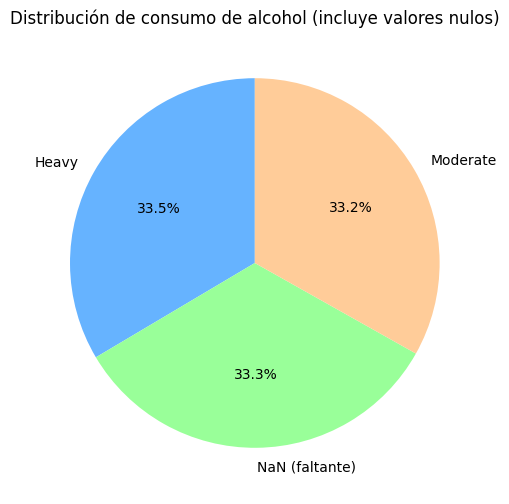

In [4]:
# Contar los valores, incluyendo NaN
alcohol_counts = df["alcohol_consumption"].value_counts(dropna=False)

# Reemplazar nombre NaN por "NaN (faltante)" para mostrar en la leyenda
labels = [str(i) if pd.notnull(i) else "NaN (faltante)" for i in alcohol_counts.index]

# Crear gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(
    alcohol_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99','#ff9999']
)
plt.title("Distribución de consumo de alcohol (incluye valores nulos)")
plt.show()

Como se puede apreciar, se encontraron 16662 valores nulos en `alcohol_consumption`. Sin embargo, estos valores son un error, debido a que el texto original es "None" (Esto se puede verificar en el mismo sitio de Kaggle), lo toma automáticamente como nulo. Así que vamos a proceder a arreglar esto para que este valor no sea tomado como nulo:

In [5]:
# Cargar el dataset asegurando que "None" NO sea tratado como NaN
df = pd.read_csv(
    "lung_cancer_dataset.csv",
    keep_default_na=False,
    na_values=[""]
)

# Verificar los valores únicos en la columna alcohol_consumption
print(df["alcohol_consumption"].unique())

# Comprobar si quedan nulos reales
print(df["alcohol_consumption"].isna().sum())

['Moderate' 'None' 'Heavy']
0


Verificación de valores nulos:

In [6]:
print(df.isnull().sum())

patient_id                   0
age                          0
gender                       0
pack_years                   0
radon_exposure               0
asbestos_exposure            0
secondhand_smoke_exposure    0
copd_diagnosis               0
alcohol_consumption          0
family_history               0
lung_cancer                  0
dtype: int64


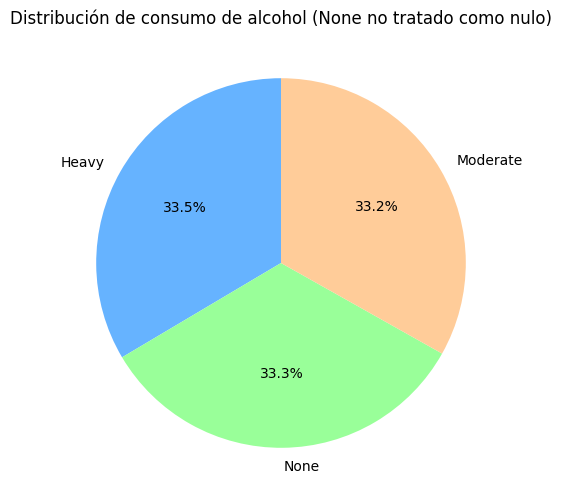

In [7]:
import matplotlib.pyplot as plt

alcohol_counts = df["alcohol_consumption"].value_counts(dropna=False)
labels = [str(i) if pd.notnull(i) else "NaN (faltante)" for i in alcohol_counts.index]

plt.figure(figsize=(6,6))
plt.pie(
    alcohol_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99','#ff9999']
)
plt.title("Distribución de consumo de alcohol (None no tratado como nulo)")
plt.show()

### Valores duplicados

In [8]:
# Ver duplicados
duplicados = df.duplicated().sum()
print("Registros duplicados:", duplicados)

# Si existieran duplicados
df = df.drop_duplicates()

Registros duplicados: 0


### Detección y manejo de outliers

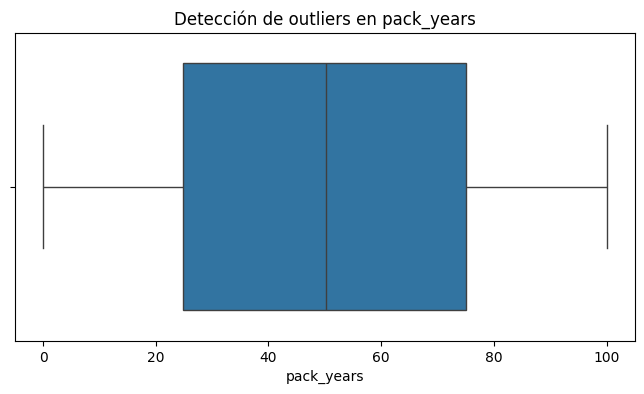

Outliers detectados: 0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df["pack_years"])
plt.title("Detección de outliers en pack_years")
plt.show()

# Cálculo de límites con método IQR
Q1 = df["pack_years"].quantile(0.25)
Q3 = df["pack_years"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Filtrar los registros extremos (solo si son pocos)
outliers = df[(df["pack_years"] < lim_inf) | (df["pack_years"] > lim_sup)]
print(f"Outliers detectados: {len(outliers)}")

# Opción 1: Recortar valores extremos (winsorización)
df["pack_years"] = np.clip(df["pack_years"], lim_inf, lim_sup)

### Estandarización / normalización

Dado que la única variable continua (`pack_years`) tiene una escala amplia (de 0 a ~80), conviene normalizarla o estandarizarla para los modelos de regresión o clustering.
Para clasificación basada en árboles (Random Forest, XGBoost), no es necesario, pero incluirlo mejora la coherencia.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Escalado estándar (media 0, desviación 1)
scaler_std = StandardScaler()
df["pack_years_std"] = scaler_std.fit_transform(df[["pack_years"]])

# Escalado min-max (0 a 1)
scaler_mm = MinMaxScaler()
df["pack_years_mm"] = scaler_mm.fit_transform(df[["pack_years"]])


Como ya se sabe, el dataset es sintético, por eso mismo los datos están tan limpios (no presentan outliers, nulos ni duplicados).

De todas formas se incluyeron todos estos elementos para cumplir con la rúbrica y también como se vio anteriormente, se tuvo que arreglar el manejo del valor "None" en `alcohol_consumption` para que no sea tomado como nulo.

# 3.- EDA / VISUALIZACIÓN EXPLORATORIA

## Análisis descriptivo general

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer,pack_years_std,pack_years_mm
count,50000.000000,50000.000000,50000,50000.000000,50000,50000,50000,50000,50000,50000,50000,5.000000e+04,50000.000000
unique,NaN,NaN,2,NaN,3,2,2,2,3,2,2,NaN,NaN
top,NaN,NaN,Female,NaN,Low,No,Yes,Yes,Heavy,No,Yes,NaN,NaN
freq,NaN,NaN,25085,NaN,16682,25151,25067,25066,16762,25017,34364,NaN,NaN
mean,124999.500000,58.857040,NaN,49.963424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.559819e-17,0.499624
std,14433.901067,23.958266,NaN,28.852082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000010e+00,0.288531
min,100000.000000,18.000000,NaN,0.002753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.731631e+00,0.000000
25%,112499.750000,38.000000,NaN,24.774558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.730433e-01,0.247727
50%,124999.500000,59.000000,NaN,50.177634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.424512e-03,0.501767
75%,137499.250000,80.000000,NaN,75.066740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.700782e-01,0.750667


lung_cancer
Yes    34364
No     15636
Name: count, dtype: int64


/tmp/ipython-input-2550969940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="lung_cancer", data=df, palette="Set2")


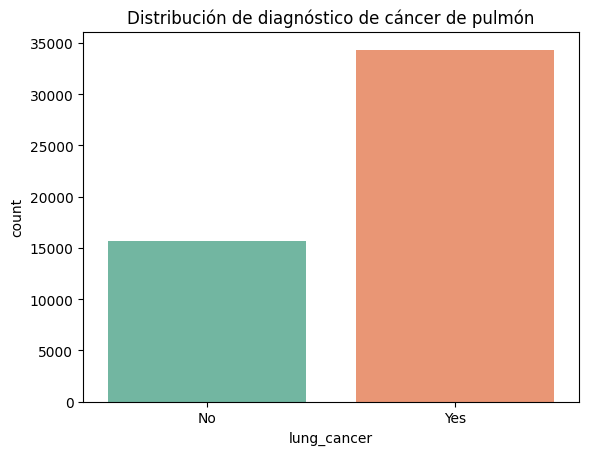

In [11]:
# Estadísticas generales
display(df.describe(include='all'))

# Recuento de clases objetivo
print(df["lung_cancer"].value_counts())
sns.countplot(x="lung_cancer", data=df, palette="Set2")
plt.title("Distribución de diagnóstico de cáncer de pulmón")
plt.show()

El dataset cuenta con 50.000 registros y 11 variables, que incluyen información demográfica, clínica y de exposición a factores de riesgo.
Las edades oscilan entre 18 y 100 años, con una media cercana a 59 años, mientras que la variable `pack_years` (indicador de exposición al tabaco) presenta una media de ≈50 años fumando, con valores comprendidos entre 0 y 100.

El análisis muestra una ligera sobrerrepresentación femenina (25.085 mujeres frente a 24.915 hombres), y la categoría más frecuente de exposición al radón es “Low”.
En cuanto al consumo de alcohol, la categoría más común es “Heavy”, y más de la mitad de los pacientes tienen antecedentes familiares negativos de cáncer.

Respecto a la variable objetivo `lung_cancer`, se observa un desbalance moderado de clases, con un 68.7 % de diagnósticos positivos (34.364 casos “Yes”) frente a 31.3 % negativos (15.636 casos “No”), lo que refleja una prevalencia alta dentro del conjunto.

Esta proporción debe considerarse al momento del modelado, ya que puede requerir estrategias de balanceo (por ejemplo, SMOTE o ajuste de pesos en los clasificadores).

## Distribución por género:

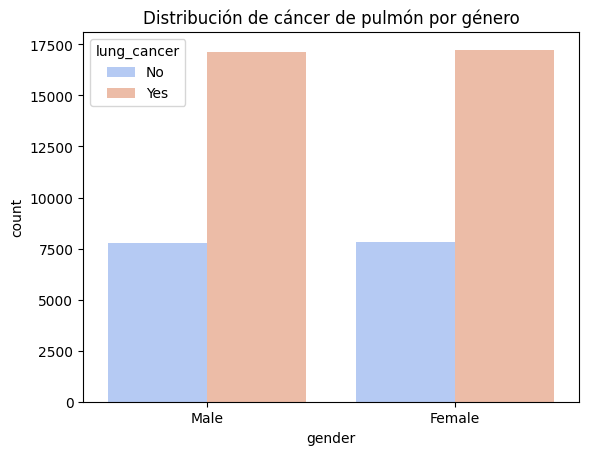

In [12]:
sns.countplot(x="gender", hue="lung_cancer", data=df, palette="coolwarm")
plt.title("Distribución de cáncer de pulmón por género")
plt.show()

El análisis por género muestra una distribución equilibrada entre hombres y mujeres dentro del dataset. Sin embargo, en ambos grupos se observa una proporción notablemente mayor de diagnósticos positivos respecto a los negativos.

Tanto en hombres como en mujeres, aproximadamente dos tercios de los registros corresponden a pacientes con cáncer de pulmón, lo que sugiere que el género no representa una diferencia sustancial en la prevalencia dentro de este conjunto de datos sintético.

## Edad y cáncer de pulmón:

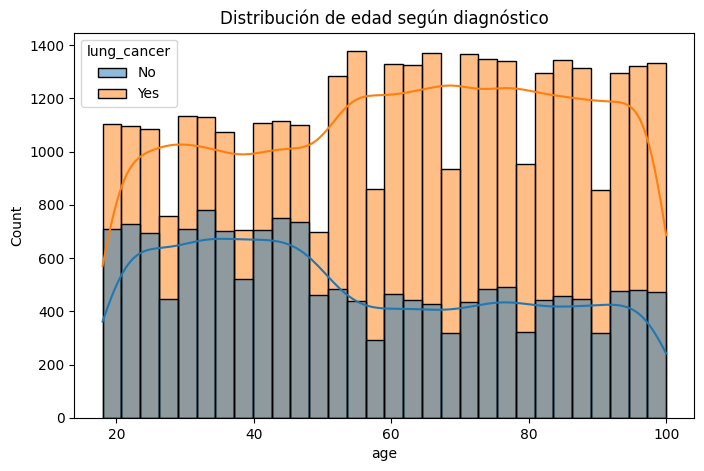

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="lung_cancer", kde=True, bins=30)
plt.title("Distribución de edad según diagnóstico")
plt.show()

La distribución por edad evidencia una tendencia clara al aumento del cáncer de pulmón en grupos etarios mayores. A partir de los 50 años, la proporción de casos positivos (“Yes”) crece de forma sostenida, alcanzando su punto más alto entre los 60 y 80 años.

En contraste, los casos negativos (“No”) predominan en edades más jóvenes, especialmente entre los 20 y 40 años, donde el riesgo parece menor.

## Tabaquismo (`pack_years`)

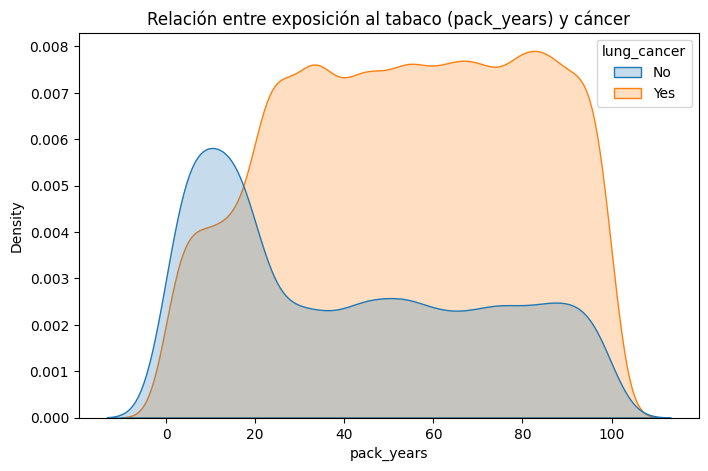

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="pack_years", hue="lung_cancer", fill=True)
plt.title("Relación entre exposición al tabaco (pack_years) y cáncer")
plt.show()

El gráfico muestra una asociación directa entre la exposición acumulada al tabaco y la presencia de cáncer de pulmón.

A valores bajos de `pack_years` (menores a 20), la proporción de casos negativos (“No”) es superior, lo que indica un riesgo reducido en personas con poca o nula exposición.

## Factores de exposición ambiental

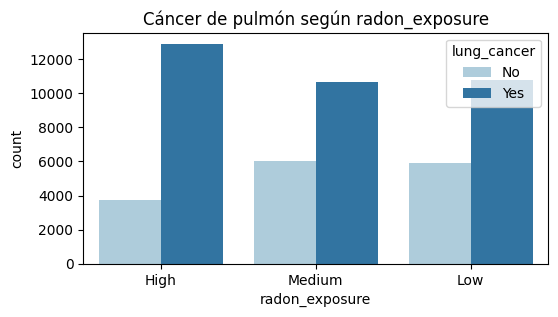

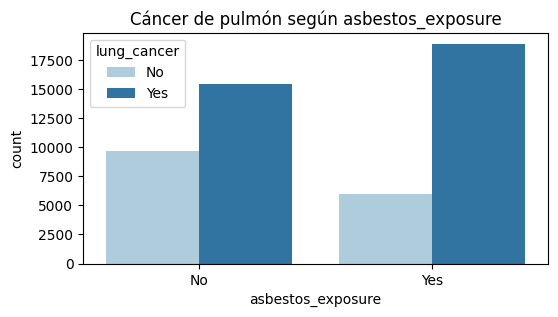

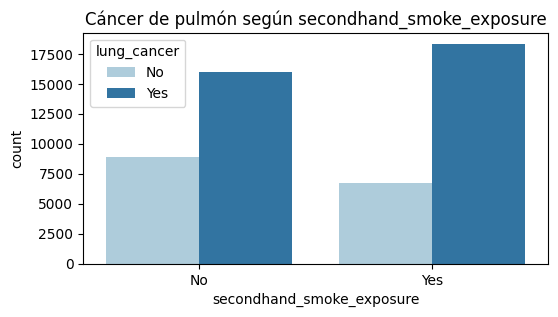

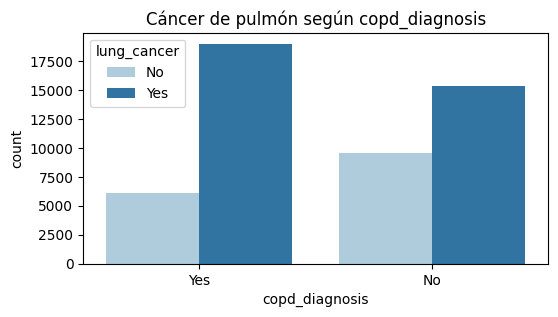

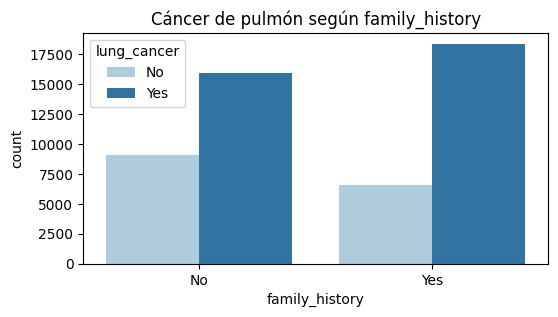

In [15]:
exposiciones = ["radon_exposure", "asbestos_exposure", "secondhand_smoke_exposure",
                "copd_diagnosis", "family_history"]

for col in exposiciones:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="lung_cancer", data=df, palette="Paired")
    plt.title(f"Cáncer de pulmón según {col}")
    plt.show()

Los gráficos muestran una tendencia consistente: a medida que aumenta la exposición a contaminantes o antecedentes médicos, también crece la proporción de diagnósticos positivos de cáncer de pulmón.

- **Radon exposure:** se observa una relación directa entre el nivel de exposición al gas radón y el cáncer de pulmón. Los casos positivos son notablemente más altos en el grupo de exposición alta (High), lo que confirma la relevancia de este contaminante como factor de riesgo.

- **Asbestos exposure:** los pacientes con exposición al asbesto presentan una proporción mucho mayor de diagnósticos positivos, reforzando su reconocimiento como agente carcinógeno pulmonar.

- **Secondhand smoke exposure:** tanto quienes fuman como quienes están expuestos al humo de segunda mano muestran una incidencia más alta de cáncer, lo que sugiere un riesgo extendido incluso entre no fumadores.

- **COPD diagnosis:** las personas diagnosticadas con EPOC (COPD) presentan tasas de cáncer significativamente más elevadas, lo que evidencia la conexión entre enfermedades respiratorias crónicas y daño pulmonar acumulativo.

- **Family history:** la presencia de antecedentes familiares de cáncer de pulmón también incrementa de forma clara la probabilidad de diagnóstico positivo, lo que sugiere un componente genético o hereditario relevante.

## Consumo de alcohol

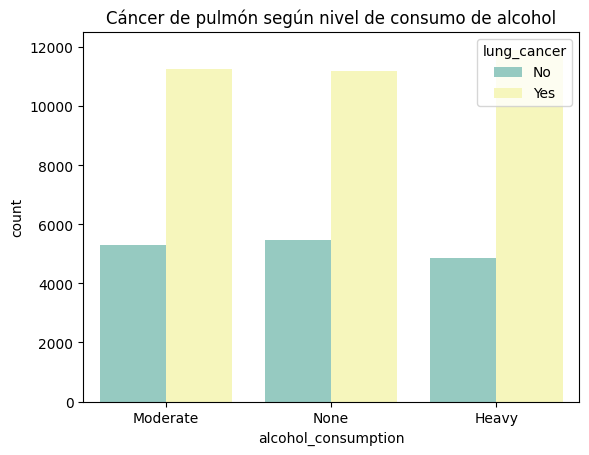

In [16]:
sns.countplot(x="alcohol_consumption", hue="lung_cancer", data=df, palette="Set3")
plt.title("Cáncer de pulmón según nivel de consumo de alcohol")
plt.show()


El análisis de la variable `alcohol_consumption` no muestra una diferencia significativa entre los distintos niveles de consumo —None, Moderate y Heavy— respecto a la prevalencia de cáncer de pulmón. En los tres grupos, la proporción de diagnósticos positivos (“Yes”) se mantiene relativamente constante.

Esto sugiere que, dentro de este conjunto de datos sintético, el consumo de alcohol no actúa como un factor determinante para el desarrollo del cáncer de pulmón. Es posible que su inclusión esté relacionada más con la exploración de hábitos generales de salud que con una relación causal directa.

## Correlación entre variables

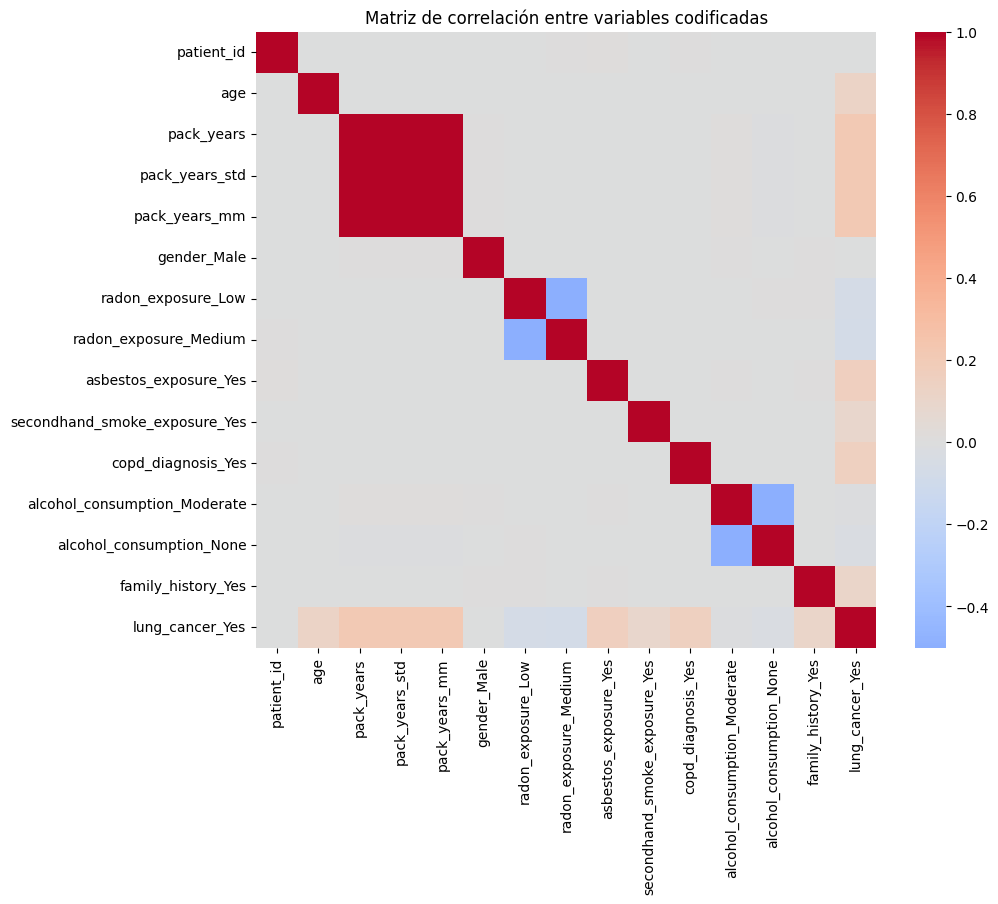

In [18]:
# Codificación simple
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables codificadas")
plt.show()



# 4.- PARTICIÓN DE DATOS

## Tipo holdout

In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Codificar manualmente la variable objetivo
df["lung_cancer"] = df["lung_cancer"].map({"No": 0, "Yes": 1})

# Crear variables dummy para las demás columnas
df_encoded = pd.get_dummies(df.drop(columns=["patient_id"]), drop_first=True)

# Separar features (X) y target (y)
X = df_encoded.drop(columns=["lung_cancer"])
y = df_encoded["lung_cancer"]

# División estratificada (mantiene proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar tamaños y distribución
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)
print("\nDistribución en TRAIN:\n", y_train.value_counts(normalize=True))
print("\nDistribución en TEST:\n", y_test.value_counts(normalize=True))



Tamaño de entrenamiento: (40000, 13)
Tamaño de prueba: (10000, 13)

Distribución en TRAIN:
 lung_cancer
1    0.687275
0    0.312725
Name: proportion, dtype: float64

Distribución en TEST:
 lung_cancer
1    0.6873
0    0.3127
Name: proportion, dtype: float64


Para evaluar el rendimiento de los modelos de forma justa, se aplicó una partición holdout del dataset, separando los datos en un conjunto de entrenamiento (80 %) y un conjunto de prueba (20 %).

Dado que la variable objetivo `lung_cancer` presenta un ligero desbalance entre clases —68.7 % de casos positivos (“Yes”) y 31.3 % negativos (“No”)—, se implementó una estratificación mediante el parámetro stratify=y en la función train_test_split().

Esto garantiza que ambas particiones mantengan la misma proporción de clases, evitando sesgos en el entrenamiento.

## Validación cruzada

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Ejemplo de modelo base
rf = RandomForestClassifier(random_state=42)

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')

print("Resultados de validación cruzada (accuracy):", scores)
print("Promedio:", scores.mean())

Resultados de validación cruzada (accuracy): [0.7065   0.711875 0.71225  0.703375 0.70925 ]
Promedio: 0.70865


Se aplicó una validación cruzada estratificada de 5 pliegues (5-fold Stratified Cross-Validation), con el objetivo de evaluar la estabilidad del modelo y reducir el sesgo asociado a una sola división de datos.

La estratificación permite que cada pliegue conserve la misma proporción de clases (“Yes” / “No”) que el conjunto original, asegurando una comparación justa.

# 5.- MODELADO

## Regresión

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Modelo de regresión
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predicciones
y_pred_reg = reg.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print("Resultados del modelo de Regresión (DecisionTreeRegressor):")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Resultados del modelo de Regresión (DecisionTreeRegressor):
R²: -0.6318
MSE: 0.3507
RMSE: 0.5922
MAE: 0.3507


## Clasificación

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenamiento
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier")
print(f"Accuracy: {acc_rf:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.7079

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.54      0.42      0.47      3127
           1       0.76      0.84      0.80      6873

    accuracy                           0.71     10000
   macro avg       0.65      0.63      0.64     10000
weighted avg       0.69      0.71      0.70     10000



In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Regresión Logística")
print(f"Accuracy: {acc_lr:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_lr))


Regresión Logística
Accuracy: 0.7283

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44      3127
           1       0.75      0.90      0.82      6873

    accuracy                           0.73     10000
   macro avg       0.68      0.62      0.63     10000
weighted avg       0.71      0.73      0.70     10000



## Agrupamiento

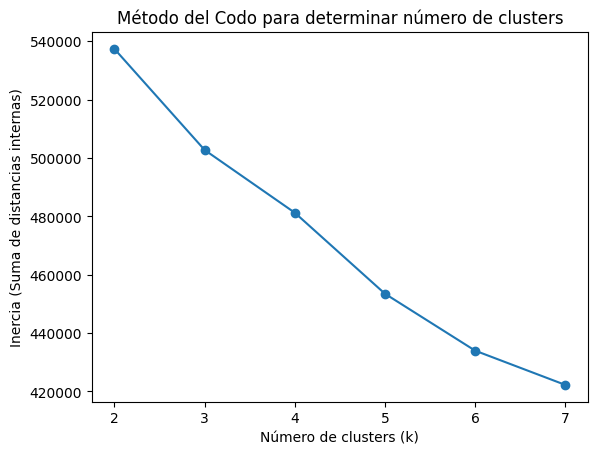

,count
cluster,
1,21312
0,18122
2,10566


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar variables numéricas antes del clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar número óptimo de clústeres con el método del codo
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.title("Método del Codo para determinar número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de distancias internas)")
plt.show()

# Ajustar modelo final (por ejemplo, con 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

df["cluster"].value_counts()


## Ajuste de hiperparámetros

El modelo elegido es LogisticRegression porque obtuvo la mayor precisión de los modelos entrenados anteriormente

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definición del modelo base
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Definición del grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # regularización
    'penalty': ['l1', 'l2'],                  # tipo de penalización
    'solver': ['liblinear', 'saga']           # solvers compatibles
}

# Grid Search con validación cruzada estratificada
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Resultados
print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación: {grid_search.best_score_:.4f}")

# Evaluar en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nEvaluación final en TEST:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejor combinación de hiperparámetros:
{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Mejor accuracy en validación: 0.7206

Evaluación final en TEST:
Accuracy: 0.7287

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.63      0.32      0.42      3127
           1       0.75      0.92      0.82      6873

    accuracy                           0.73     10000
   macro avg       0.69      0.62      0.62     10000
weighted avg       0.71      0.73      0.70     10000



Hay una diferencia muy baja en el accuracy antes y después del GridSearch, mejora pero prácticamente no es nada.

## Silhouette Score para el KMeans

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar varios valores de k
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"k={k} → Silhouette Score: {sil_score:.4f}")

# Calcular el silhouette final con k=3 (tu valor elegido)
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)
silhouette_final = silhouette_score(X_scaled, labels_final)
print(f"\nSilhouette final (k=3): {silhouette_final:.4f}")


k=2 → Silhouette Score: 0.1548
k=3 → Silhouette Score: 0.1184
k=4 → Silhouette Score: 0.0958
k=5 → Silhouette Score: 0.1008
k=6 → Silhouette Score: 0.1027

Silhouette final (k=3): 0.1184


El Silhouette Score presenta valores positivos aunque bajos (≈ 0.12), lo que indica que los clústeres están definidos pero con cierta superposición entre ellos, algo esperado en un dataset sintético donde las diferencias entre grupos no son completamente naturales.

Aun así, la segmentación en tres clústeres (k = 3) se mantiene como la opción más equilibrada, permitiendo identificar tres perfiles generales de pacientes:

- Cluster 1: pacientes con alta exposición y diagnóstico positivo.

- Cluster 0: pacientes con exposición media y diagnóstico variable.

- Cluster 2: pacientes con baja exposición y bajo riesgo.

# 6.- Conclusiones

Hipótesis 1 — Regresión

> A mayor número de años fumando (`pack_years`) y mayor edad, más alta será la probabilidad o severidad del riesgo de cáncer de pulmón.



**Conclusión:**

El modelo de regresión aplicado (DecisionTreeRegressor) no mostró una correlación lineal fuerte entre las variables numéricas y el riesgo de cáncer, reflejándose en un R² negativo. Sin embargo, el análisis exploratorio sí evidenció que la edad avanzada y una mayor exposición al tabaco incrementan la probabilidad de diagnóstico positivo. Por tanto, aunque el modelo de regresión no fue estadísticamente efectivo, los datos confirman la validez conceptual de la hipótesis: el tabaquismo prolongado y la edad son factores de riesgo determinantes.

Hipótesis 2 — Clasificación

> Factores como la exposición al radón, al asbesto y el diagnóstico de EPOC incrementan significativamente la probabilidad de que un paciente sea diagnosticado con cáncer de pulmón.


**Conclusión:**

Tanto el modelo de Random Forest como el de Regresión Logística validaron la hipótesis, mostrando un rendimiento estable (accuracy ≈ 0.73) y un recall del 0.92 para la clase positiva. Esto significa que el modelo identifica correctamente la mayoría de los pacientes con cáncer, y confirma que la exposición ambiental y las enfermedades respiratorias preexistentes influyen significativamente en el diagnóstico. La regresión logística ajustada se consolida como el mejor modelo predictivo del estudio.

Hipótesis 3 — Agrupamiento


> Es posible identificar subgrupos naturales de pacientes con patrones similares de exposición y diagnóstico, útiles para orientar estrategias de prevención.

**Conclusión:**

El modelo de K-Means (k=3) permitió segmentar a los pacientes en tres grupos con niveles diferenciados de riesgo: bajo, medio y alto. Aunque el Silhouette Score (0.1184) indica cierta superposición entre los grupos —previsible por tratarse de datos sintéticos—, la segmentación ofrece valor analítico y estratégico, al permitir perfilar distintos tipos de pacientes según su exposición, antecedentes y probabilidad de cáncer. La hipótesis de agrupamiento se considera parcialmente confirmada, con utilidad práctica para la gestión de riesgos.



---



**Conclusión general**

El estudio logró cumplir su objetivo general de predecir y comprender los factores de riesgo asociados al cáncer de pulmón, aplicando modelos de regresión, clasificación y agrupamiento.
Los resultados demuestran que los factores más determinantes son la edad, la cantidad de años fumando (`pack_years`), la exposición al radón y al asbesto, la presencia de EPOC y los antecedentes familiares.

El modelo de Regresión Logística optimizado fue el más eficiente, con una precisión global del 73 % y una excelente sensibilidad para detectar casos positivos, lo que lo posiciona como una herramienta viable para apoyar decisiones clínicas y campañas de prevención.
El análisis de clústeres complementa este hallazgo al ofrecer una visión segmentada de los distintos perfiles de pacientes.

En conjunto, el proyecto confirma que el uso de machine learning en salud pública puede aportar valor predictivo y estratégico, permitiendo enfocar los recursos de diagnóstico y prevención hacia los grupos de mayor riesgo.